
## Bayesian inference on normal model


Likelihood:
$$
x|\mu, \tau \sim N(\mu, \tau^{-1})
$$

Prior:
$$
\tau \sim 
\Gamma(\alpha,\beta), \quad \alpha,\beta > 0
$$

$$
\mu | \tau \sim N\left(a_0, (\lambda\tau)^{-1}\right), \quad a_0 \in \mathbb R, \lambda > 0
$$

Posterior:
$$
p(\mu,\tau) \propto p(x|\mu, \tau) p(\mu,\tau) = p(x|\mu, \tau) p(\mu|\tau) p(\tau)
$$

In [1]:
import numpy as np
from scipy.stats import gamma, norm
import matplotlib.pyplot as plt

In [2]:
# ground truth values
gt_mu = 2
gt_tau = 1

np.random.seed(222)
n_observarions = 5
x = norm.rvs(gt_mu, gt_tau**(-1/2), n_observarions)
x

array([3.96342502, 2.27576969, 2.4586582 , 3.00126466, 1.23616469])

In [3]:
n_grid = 1000
mu_grid = np.linspace(-3, 3, n_grid)
tau_grid = np.linspace(0.001, 4, n_grid)
mu_mg, tau_mg = np.meshgrid(mu_grid, tau_grid)

In [4]:
# prior

alpha = 1
beta = 1
a_0 = 0
lmbd = 1

prior_tau = gamma(a=alpha, scale=beta).pdf
prior_mu_given_tau = lambda mu, tau: norm.pdf(mu, loc=a_0, scale=(lmbd * tau)**(-1/2))

prior = lambda mu, tau: prior_mu_given_tau(mu,tau) * prior_tau(tau)
#prior = lambda mu, tau: 2 + np.cos(2*mu-1) + np.sin(2*tau-3)
prior_grid = prior(mu_mg, tau_mg)

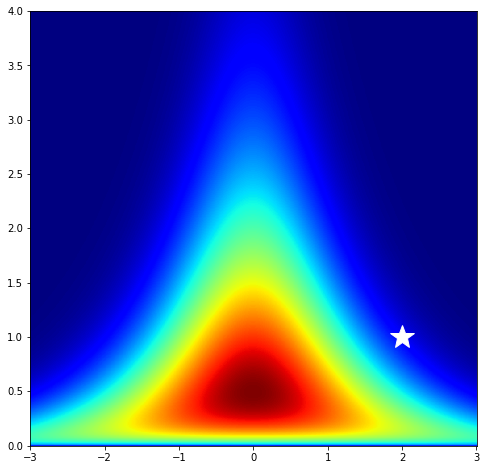

In [5]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(mu_mg, tau_mg, prior_grid, cmap='jet', shading='auto')
plt.plot(gt_mu, gt_tau, marker="*", color='white', markersize=25)
plt.show()

In [6]:
# likelihood 
likelihood = lambda mu, tau: np.prod([norm.pdf(xi, loc=mu, scale=tau**(-1/2)) for xi in x],
                                    axis=0)
likelihood_grid = likelihood(mu_mg, tau_mg)

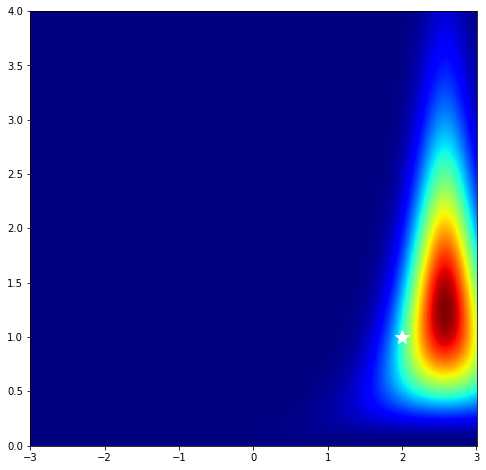

In [7]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(mu_mg, tau_mg, likelihood_grid, cmap='jet', shading='auto')
plt.plot(gt_mu, gt_tau, marker="*", color='white', markersize=15)
plt.show()

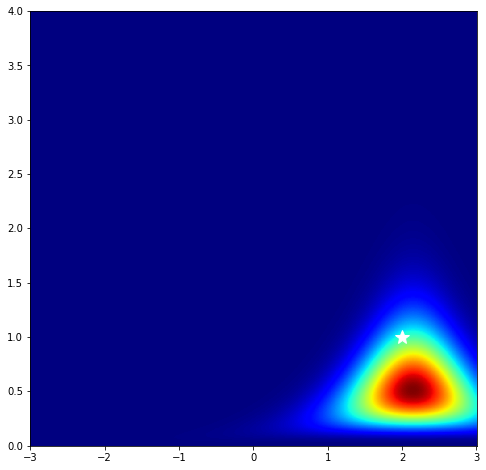

In [8]:
# posterior
posterior_grid = likelihood_grid * prior_grid

plt.figure(figsize=(8, 8))
plt.pcolormesh(mu_mg, tau_mg, posterior_grid, cmap='jet', shading='auto')
plt.plot(gt_mu, gt_tau, marker="*", color='white', markersize=15)
plt.show()

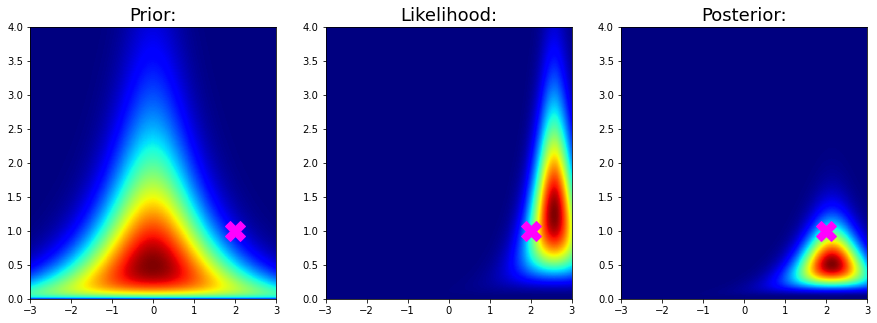

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Prior:', fontsize=18)
plt.pcolormesh(mu_mg, tau_mg, prior_grid, cmap='jet', shading='auto')
plt.plot(gt_mu, gt_tau, marker="X", color='magenta', markersize=20)
plt.subplot(1, 3, 2)
plt.title('Likelihood:', fontsize=18)
plt.pcolormesh(mu_mg, tau_mg, likelihood_grid, cmap='jet', shading='auto')
plt.plot(gt_mu, gt_tau, marker="X", color='magenta', markersize=20)
plt.subplot(1, 3, 3)
plt.title('Posterior:', fontsize=18)
plt.pcolormesh(mu_mg, tau_mg, posterior_grid, cmap='jet', shading='auto')
plt.plot(gt_mu, gt_tau, marker="X", color='magenta', markersize=20)
plt.show()